In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [155]:
df = pd.read_csv('features_train.csv')
cl = pd.read_csv('classes_train.csv')

In [156]:
df_clear = df.copy()
df_clear['is_bot'] = pd.Series(cl['is_bot'], index = df_clear.index)
df_clear.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


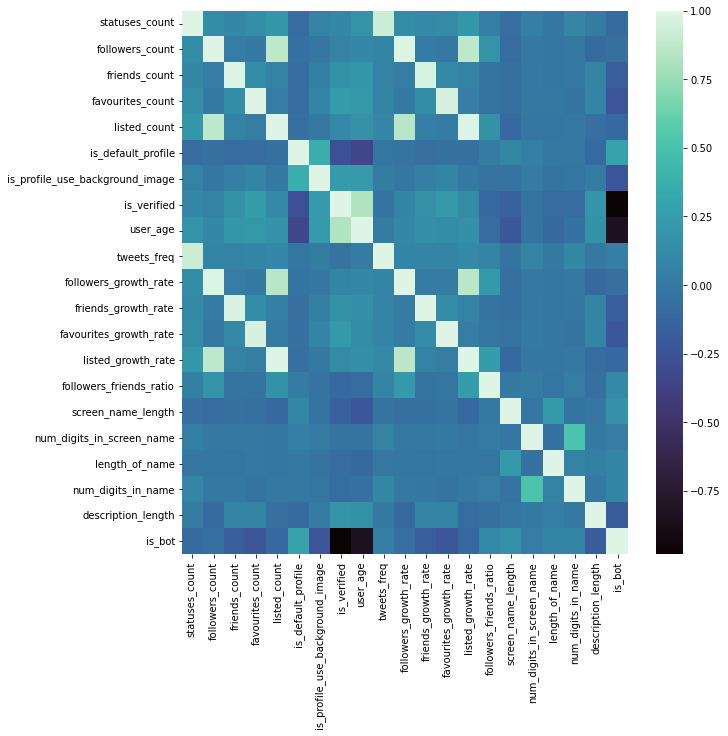

In [157]:
# Визуализация 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_clear.corr(), cmap = "mako")

In [158]:
# Подготовка данных
X = df_clear.drop('is_bot', axis = 1)
Y = df_clear.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

In [159]:
# для сравнения значений F-меры
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [160]:
# LogisticRegression
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)


model_Log = LogisticRegression()   
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

In [161]:
# KNeighborsClassifier
KNN = KNeighborsClassifier()
scaler = StandardScaler()
steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

In [162]:
# DecisionTreeClassifier
DTC = DecisionTreeClassifier()
scaler = StandardScaler()
steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(Y_test, Y_DTC, average = "weighted")

In [163]:
# RandomForestClassifier
RFC = RandomForestClassifier()
scaler = StandardScaler()
steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [164]:
best_f = 0

for i, j in F_measure.items():
    print ( 'F-мера:', j,'Модель:', i)
    if j > best_f:
        best_f = j
        best_f_model = i
print ('Лучшая модель:', best_f_model)

F-мера: 0.9966666666666667 Модель: LogisticRegression
F-мера: 0.9798202354201699 Модель: KNeighborsClassifier
F-мера: 0.9950158543362426 Модель: DecisionTreeClassifier
F-мера: 0.9983315321915928 Модель: RandomForestClassifier
Лучшая модель: RandomForestClassifier


In [165]:
# Сохранение модели
joblib.dump(model_Log, 'lg_model.pkl')

['lg_model.pkl']